# Presentation: Statistical Learning Course
### Name: ONOJA Anthony PhD Data Science, Scuola Normale Superiore, Pisa, Italy

##### Importing necessary libraries

In [1]:
# Import all the necessary libraries for the analysis 
# Import all the necessary libraries for the analysis 

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image
import os
import scipy

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image
import os
import scipy

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# Getting the dataset
df = pd.read_csv("d123.csv")

In [3]:
df.head(4)

,country,asthma,chronic_lower_respiratory_diseases,BMI,diabetes,everyday_alcohol,longstanding_health_issues,population_density,inform_risk,population_living_urban_areas,...,inform_vulnerability,inform_health_condition,epidemic_lack_coping_capacity,physicians_density,current_health_expenditure_per_capita,Age_average,Body_pain,Smoking_average,total_deaths_COVID_19,Risk_status
0,Austria,4.4,4.2,50.4,4.9,6.2,14.61,107.21,1.6,58.30,...,2.6,0.1,2.3,51.44,5295.18,13.50,20.45,47.15,168,2
1,Belgium,4.3,4.0,48.8,5.3,14.2,8.22,377.21,1.9,98.00,...,1.9,0.1,1.7,33.23,4667.88,13.00,24.55,47.95,1143,3
2,Bulgaria,2.7,4.6,44.6,6.4,8.9,9.02,64.70,2.4,75.01,...,2.3,0.2,3.1,39.88,1577.94,13.90,16.80,46.70,14,1
3,Croatia,3.0,4.2,41.9,7.1,9.1,12.12,73.08,2.1,56.95,...,1.1,0.1,3.0,29.96,1705.21,14.03,20.00,48.15,8,1


In [4]:
print(df.size)
print(df.shape)

651
(31, 21)


In [5]:
print(df.columns)

Index(['country', 'asthma', 'chronic_lower_respiratory_diseases', 'BMI',
       'diabetes', 'everyday_alcohol', 'longstanding_health_issues',
       'population_density', 'inform_risk', 'population_living_urban_areas',
       'basic_sanitation_services', 'inform_vulnerability',
       'inform_health_condition', 'epidemic_lack_coping_capacity',
       'physicians_density', 'current_health_expenditure_per_capita',
       'Age_average', 'Body_pain', 'Smoking_average', 'total_deaths_COVID_19',
       'Risk_status'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 21 columns):
country                                  31 non-null object
asthma                                   31 non-null float64
chronic_lower_respiratory_diseases       31 non-null float64
BMI                                      31 non-null float64
diabetes                                 31 non-null float64
everyday_alcohol                         29 non-null float64
longstanding_health_issues               31 non-null float64
population_density                       31 non-null float64
inform_risk                              31 non-null float64
population_living_urban_areas            31 non-null float64
basic_sanitation_services                31 non-null float64
inform_vulnerability                     31 non-null float64
inform_health_condition                  31 non-null float64
epidemic_lack_coping_capacity            31 non-null float64
physicians_density                       31 

In [7]:
# Get some decriptive statistics (count, mean, std, minimum, maximum, 25%, 50% and 75% percentiles)
df.describe()

,asthma,chronic_lower_respiratory_diseases,BMI,diabetes,everyday_alcohol,longstanding_health_issues,population_density,inform_risk,population_living_urban_areas,basic_sanitation_services,inform_vulnerability,inform_health_condition,epidemic_lack_coping_capacity,physicians_density,current_health_expenditure_per_capita,Age_average,Body_pain,Smoking_average,total_deaths_COVID_19,Risk_status
count,31.000000,31.000000,31.000000,31.000000,29.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,5.461290,3.790323,45.729032,6.416129,6.758621,14.757419,172.274516,1.883871,74.321290,97.437097,1.987097,0.212903,3.477419,35.053548,3401.989677,12.835484,20.980645,47.404839,1334.129032,1.677419
std,2.124567,1.523670,3.562227,1.651887,5.472628,6.145550,271.164927,0.884721,13.331147,3.821237,0.996909,0.172708,2.030223,8.808220,1636.306859,1.418442,4.166287,0.779354,3367.827378,0.832150
min,2.000000,1.100000,38.000000,4.200000,0.500000,1.980000,3.530000,0.600000,53.730000,84.310000,0.600000,0.100000,0.900000,17.610000,1089.240000,7.930000,14.150000,46.300000,0.000000,1.000000
25%,4.200000,2.650000,43.000000,4.850000,2.100000,11.615000,71.765000,1.300000,64.190000,97.655000,1.250000,0.100000,2.000000,30.115000,1975.440000,12.385000,17.500000,46.700000,17.000000,1.000000
50%,4.900000,3.900000,44.600000,6.400000,6.900000,13.870000,107.210000,1.700000,75.010000,98.800000,1.900000,0.200000,3.000000,33.360000,3259.800000,13.030000,20.950000,47.350000,59.000000,1.000000
75%,6.750000,4.850000,49.500000,7.450000,9.300000,18.895000,137.835000,2.250000,84.390000,99.265000,2.450000,0.250000,5.300000,40.810000,4937.635000,13.850000,23.625000,47.975000,379.000000,2.000000
max,9.400000,7.700000,52.500000,10.000000,24.200000,27.920000,1511.030000,5.000000,98.000000,99.970000,4.900000,0.800000,8.200000,54.000000,6374.200000,14.930000,31.200000,49.150000,14681.000000,3.000000


C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.

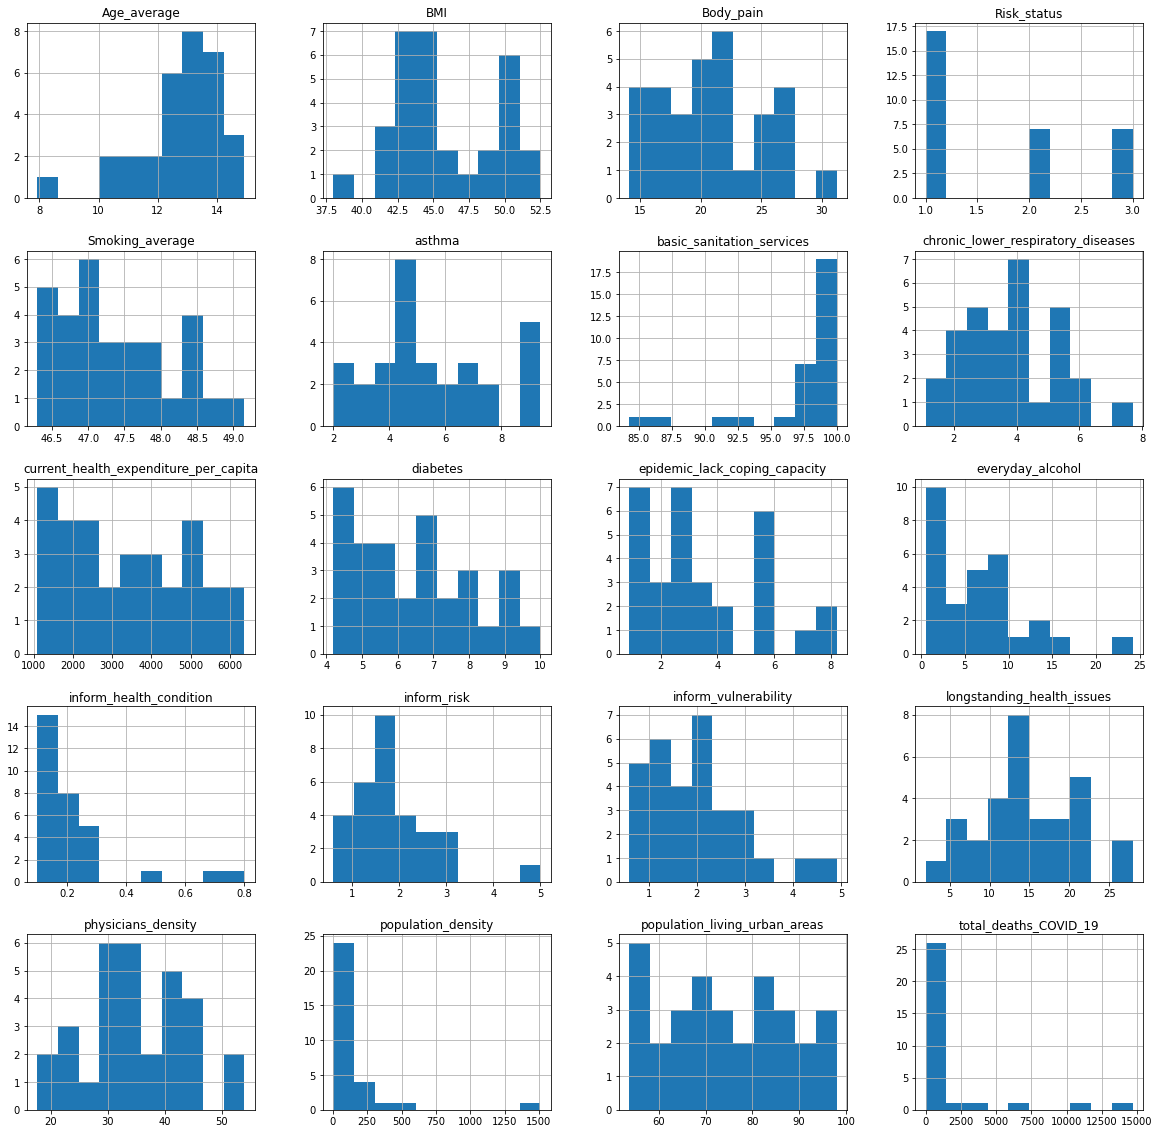

In [8]:
# Visually the dataset by plotting histogram
df.hist(figsize=(20,20))
plt.show()

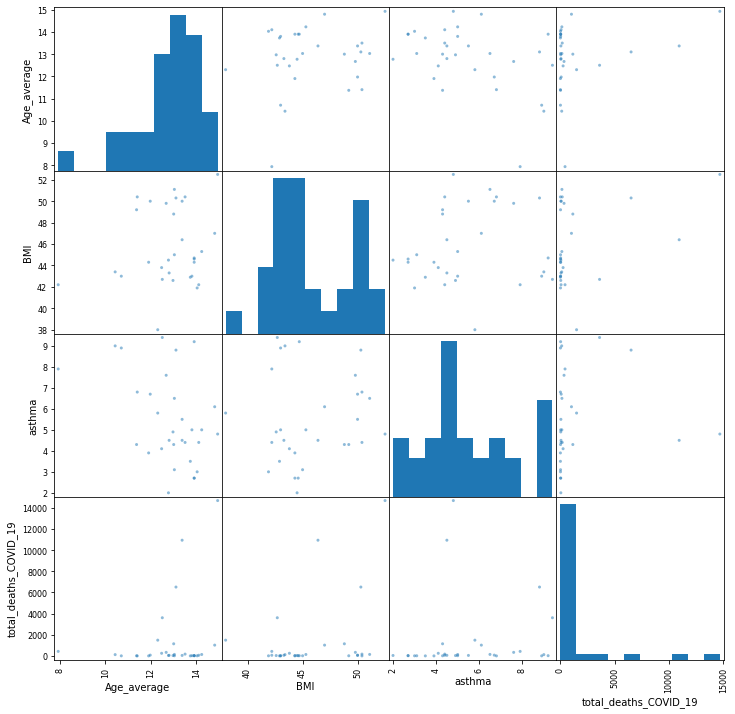

In [9]:
# plot some variables using scatter plot to visualize 
from pandas.plotting import scatter_matrix

pd.plotting.scatter_matrix(df[['Age_average', 'BMI', 'asthma', 'total_deaths_COVID_19']],figsize=(12,12))
plt.show()

In [10]:
# Checking for missing observations 

df.isnull().any()

country                                  False
asthma                                   False
chronic_lower_respiratory_diseases       False
BMI                                      False
diabetes                                 False
everyday_alcohol                          True
longstanding_health_issues               False
population_density                       False
inform_risk                              False
population_living_urban_areas            False
basic_sanitation_services                False
inform_vulnerability                     False
inform_health_condition                  False
epidemic_lack_coping_capacity            False
physicians_density                       False
current_health_expenditure_per_capita    False
Age_average                              False
Body_pain                                False
Smoking_average                          False
total_deaths_COVID_19                    False
Risk_status                              False
dtype: bool

In [11]:
# Filling Missing observations in Continuous variables in the dataset:
df.fillna(df.mean(), inplace=True)

In [12]:
# We want to know how well does each feature correlate the variables
df.corr() #method : {‘pearson’, ‘kendall’, ‘spearman’}

,asthma,chronic_lower_respiratory_diseases,BMI,diabetes,everyday_alcohol,longstanding_health_issues,population_density,inform_risk,population_living_urban_areas,basic_sanitation_services,inform_vulnerability,inform_health_condition,epidemic_lack_coping_capacity,physicians_density,current_health_expenditure_per_capita,Age_average,Body_pain,Smoking_average,total_deaths_COVID_19,Risk_status
asthma,1.000000,0.054043,0.096566,0.084810,-0.147059,0.513836,0.098226,-0.075535,0.382349,0.164113,0.184364,-0.242964,-0.287844,0.025440,0.388686,-0.428521,-0.085986,-0.309705,0.079143,0.324535
chronic_lower_respiratory_diseases,0.054043,1.000000,0.189024,0.254077,0.210834,-0.162761,0.155225,0.359419,0.080356,-0.236967,0.264789,-0.015977,0.460910,-0.152591,0.031835,-0.003645,0.008896,0.062498,0.129104,0.078954
BMI,0.096566,0.189024,1.000000,-0.301104,0.236808,0.044761,0.171848,-0.038240,0.114315,0.241245,0.279825,-0.080817,0.186945,0.319349,0.308971,0.171179,0.039524,-0.262878,0.331492,0.192179
diabetes,0.084810,0.254077,-0.301104,1.000000,0.356030,0.142397,-0.034761,0.448138,-0.096490,-0.129920,0.273188,-0.086046,0.087379,-0.193848,-0.295537,0.092658,0.178356,0.307015,0.191885,0.224579
everyday_alcohol,-0.147059,0.210834,0.236808,0.356030,1.000000,-0.132978,0.192346,0.166213,-0.007506,-0.296044,0.021731,-0.022545,0.192331,0.100493,-0.066341,0.466916,0.129498,0.334380,0.397537,0.423416
longstanding_health_issues,0.513836,-0.162761,0.044761,0.142397,-0.132978,1.000000,-0.096031,-0.319891,0.168489,0.113460,0.078053,0.086052,-0.419566,0.025209,0.285534,-0.045986,0.055763,0.048772,-0.131072,0.173277
population_density,0.098226,0.155225,0.171848,-0.034761,0.192346,-0.096031,1.000000,0.007982,0.401503,0.186150,0.070689,-0.207773,0.126274,0.009332,0.144966,-0.150361,-0.196775,0.037837,0.011460,0.099148
inform_risk,-0.075535,0.359419,-0.038240,0.448138,0.166213,-0.319891,0.007982,1.000000,-0.213120,-0.194371,0.720100,-0.112032,0.069197,-0.396533,-0.522030,-0.327702,0.447688,0.231440,0.187835,0.173803
population_living_urban_areas,0.382349,0.080356,0.114315,-0.096490,-0.007506,0.168489,0.401503,-0.213120,1.000000,0.317166,0.166902,-0.173783,-0.235416,0.383677,0.582686,-0.090645,-0.134466,-0.065394,0.098992,0.279962
basic_sanitation_services,0.164113,-0.236967,0.241245,-0.129920,-0.296044,0.113460,0.186150,-0.194371,0.317166,1.000000,0.090222,-0.341681,-0.021247,0.263312,0.334476,-0.099909,0.006696,0.000044,0.167354,0.114062


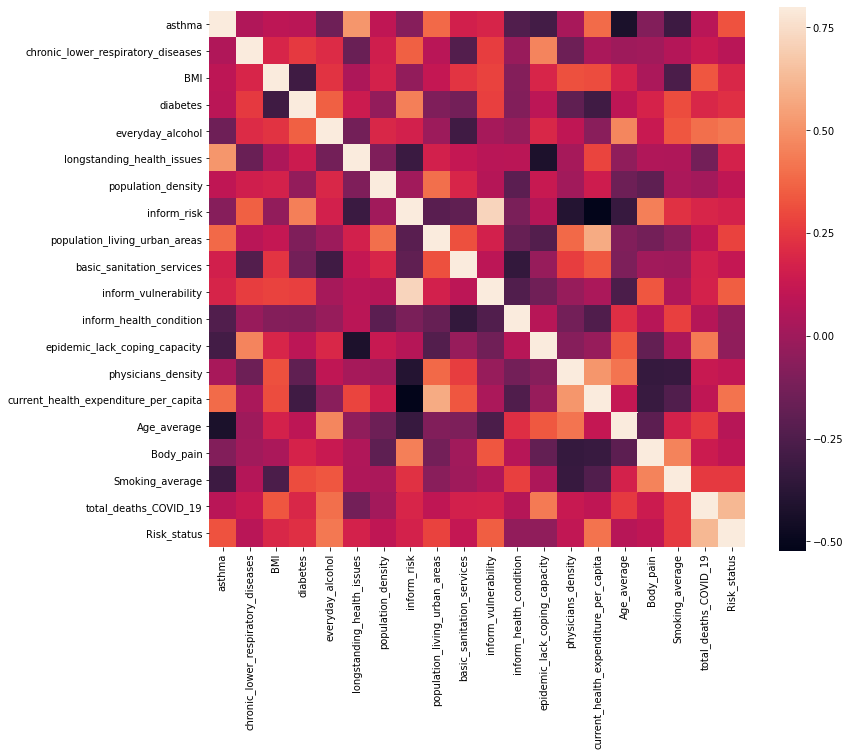

In [13]:
# Correlation matrix
import seaborn as sns

correlation_matrix = df.corr()
fig = plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix,vmax = 0.8, square = True)
plt.show()

In [14]:
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)

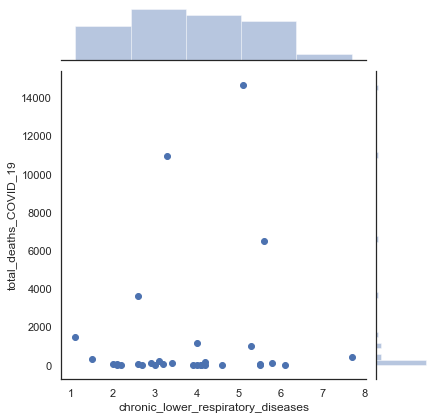

In [15]:
g = sns.jointplot(x="chronic_lower_respiratory_diseases", y="total_deaths_COVID_19", data=df)

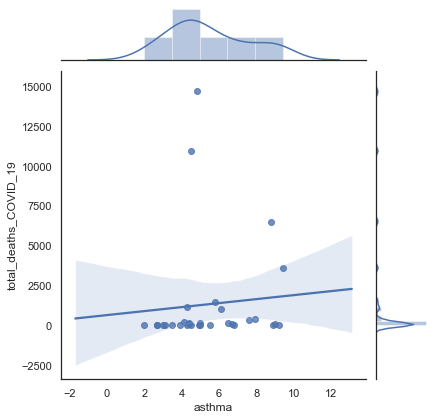

In [16]:
g = sns.jointplot("asthma", "total_deaths_COVID_19", data=df, kind="reg")

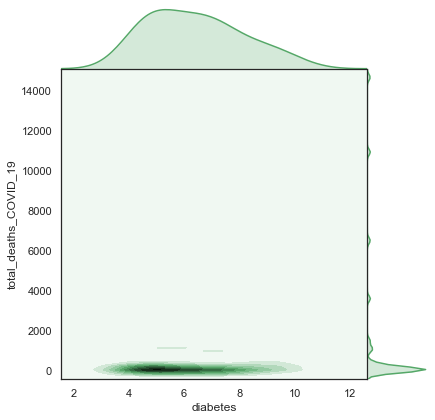

In [17]:
g = sns.jointplot("diabetes", "total_deaths_COVID_19", data= df,
                  kind="kde", space=0, color="g")

In [18]:
features = ['asthma', 'chronic_lower_respiratory_diseases', 'BMI',
       'diabetes', 'everyday_alcohol', 'longstanding_health_issues',
       'population_density', 'inform_risk',
       'population_living_urban_areas', 'basic_sanitation_services',
       'inform_vulnerability', 'inform_health_condition',
       'epidemic_lack_coping_capacity', 'physicians_density',
       'current_health_expenditure_per_capita',
       'Age_average', 'Body_pain', 'Smoking_average']

In [19]:
# Separating out the features
X = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Risk_status']].values

In [20]:
df['Risk_status'].replace(1, 'Low',inplace=True)
df['Risk_status'].replace(2, 'Medium',inplace=True)
df['Risk_status'].replace(3, 'High',inplace=True)

In [21]:
df.head(4)

,country,asthma,chronic_lower_respiratory_diseases,BMI,diabetes,everyday_alcohol,longstanding_health_issues,population_density,inform_risk,population_living_urban_areas,...,inform_vulnerability,inform_health_condition,epidemic_lack_coping_capacity,physicians_density,current_health_expenditure_per_capita,Age_average,Body_pain,Smoking_average,total_deaths_COVID_19,Risk_status
0,Austria,4.4,4.2,50.4,4.9,6.2,14.61,107.21,1.6,58.30,...,2.6,0.1,2.3,51.44,5295.18,13.50,20.45,47.15,168,Medium
1,Belgium,4.3,4.0,48.8,5.3,14.2,8.22,377.21,1.9,98.00,...,1.9,0.1,1.7,33.23,4667.88,13.00,24.55,47.95,1143,High
2,Bulgaria,2.7,4.6,44.6,6.4,8.9,9.02,64.70,2.4,75.01,...,2.3,0.2,3.1,39.88,1577.94,13.90,16.80,46.70,14,Low
3,Croatia,3.0,4.2,41.9,7.1,9.1,12.12,73.08,2.1,56.95,...,1.1,0.1,3.0,29.96,1705.21,14.03,20.00,48.15,8,Low


In [22]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [24]:
finalDf = pd.concat([principalDf, df[['Risk_status', 'country']]], axis = 1)

In [25]:
finalDf.head(4)

,principal component 1,principal component 2,Risk_status,country
0,-1.561890,-0.412450,Medium,Austria
1,-0.584151,0.511710,High,Belgium
2,1.435676,-1.422423,Low,Bulgaria
3,1.980693,-1.325595,Low,Croatia


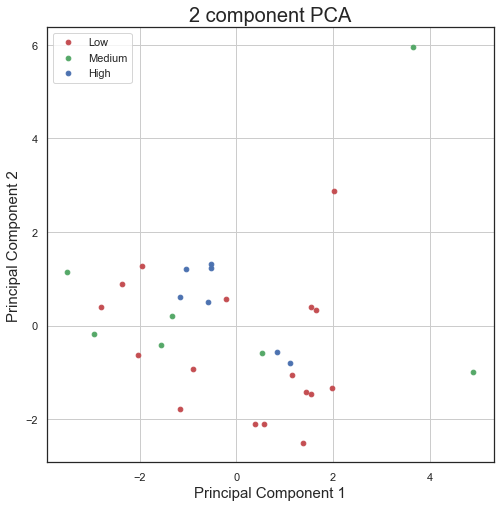

In [26]:
# Visualization of the PCA 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Low', 'Medium', 'High']
colors = ['r', 'g', 'b']
for Risk_status, color in zip(targets,colors):
    indicesToKeep = finalDf['Risk_status'] == Risk_status
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 22)
ax.legend(targets)
ax.grid()

In [27]:
# import the necessary packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

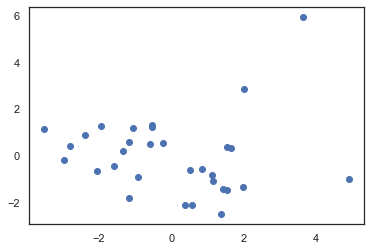

In [28]:
# Visualize true data points before the applications of K-means clustering 
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1], label='True Position')

#### K-means clustering algorithm

In [29]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(principalDf)

In [30]:
km.labels_[:5]

array([2, 2, 0, 0, 1])

In [31]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([13,  2, 16], dtype=int64))

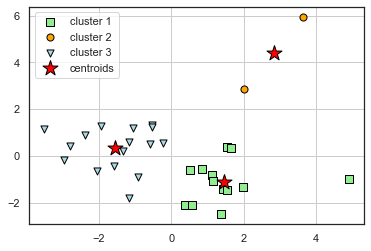

In [32]:
# plot the 3 clusters
plt.scatter(
    principalDf.iloc[y_km == 0, 0], principalDf.iloc[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1')

plt.scatter(
    principalDf.iloc[y_km == 1, 0], principalDf.iloc[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2')

plt.scatter(
    principalDf.iloc[y_km == 2, 0], principalDf.iloc[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3')

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

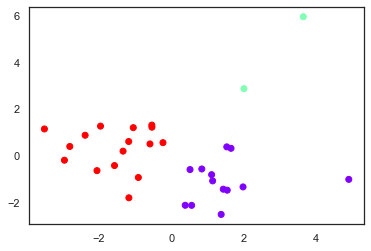

In [33]:
# Visualize the data points after applying the k-means clustering  
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1], c=km.labels_, cmap='rainbow')

In [34]:
# Performing Centering of the k-means 
km.cluster_centers_

array([[ 1.46082242, -1.0956144 ],
       [ 2.82333062,  4.41088342],
       [-1.53983454,  0.33882628]])

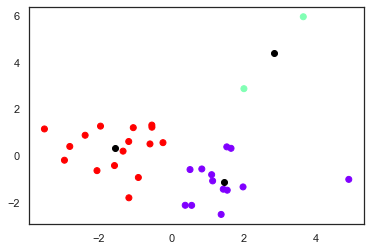

In [35]:
# Visualising the clusters after centering 
#Plot the centroid. This time we're going to use the cluster centres  

plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1], c=km.labels_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1], color='black')

In [36]:
# Determining the exact cluster number using the silhouette elbow approach 

print('SSE %s' % km.inertia_)
print('Silhouette %s' % silhouette_score(principalDf, km.labels_))

SSE 57.34013521705285
Silhouette 0.5001444747541021


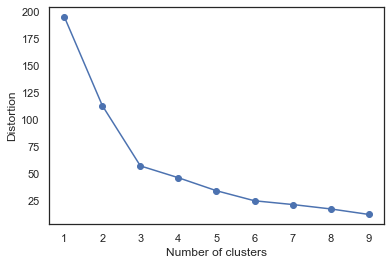

In [37]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 10):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(principalDf)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Hierarchical Clustering of the dataset 

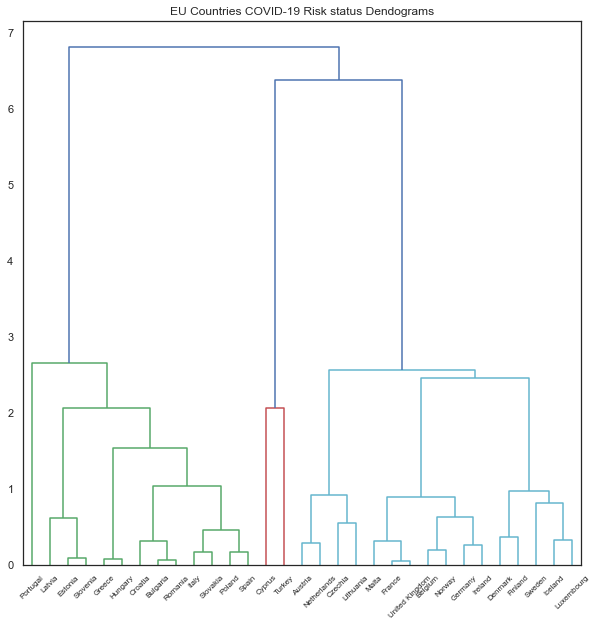

In [38]:
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler

# Standardizing the features
X = StandardScaler().fit_transform(principalDf)

plt.figure(figsize=(10, 10))
plt.title("EU Countries COVID-19 Risk status Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'), labels=list(finalDf.country))

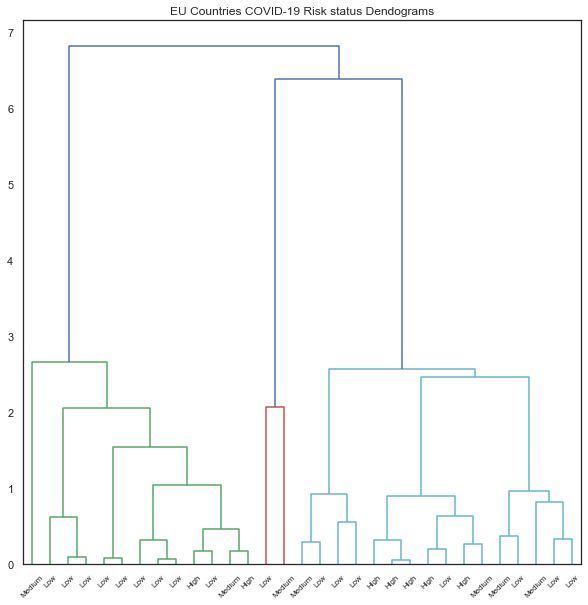

In [39]:
plt.figure(figsize=(10, 10))
plt.title("EU Countries COVID-19 Risk status Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'), labels=list(finalDf.Risk_status))

array([1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 1], dtype=int64)

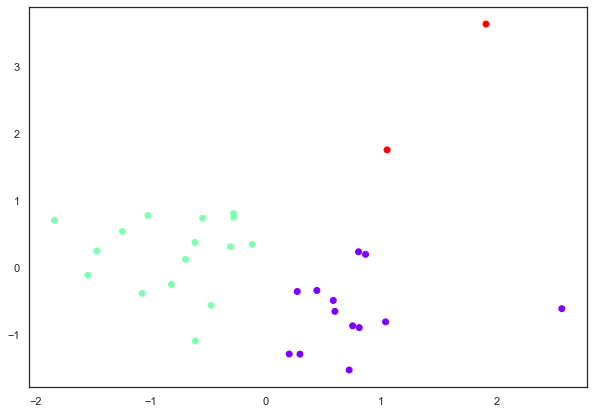

In [41]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')

### Density-Based Spatial Clustering of Applications (DBSCA)

In [42]:
import numpy as np
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Standardizing the features
X = StandardScaler().fit_transform(principalDf)

In [43]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

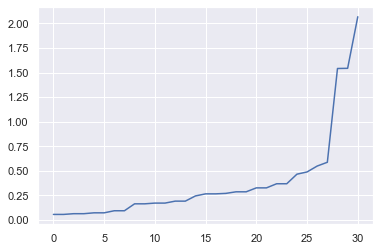

In [44]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [45]:
m = DBSCAN(eps=0.2, min_samples=5)
m.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [46]:
clusters = m.labels_
# Labels, note: noisy samples are given by the label -1
m.labels_[:5]

array([-1, -1, -1, -1, -1], dtype=int64)

In [47]:
# A look at the size of the clusters
np.unique(m.labels_, return_counts=True)

(array([-1], dtype=int64), array([31], dtype=int64))

In [48]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

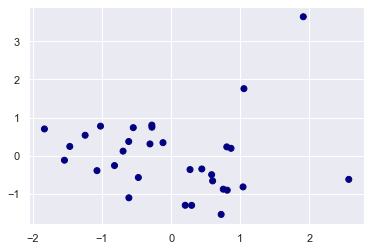

In [49]:
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))

#### Knee Method to estimate the best eps

In [50]:
from scipy.spatial.distance import pdist, squareform

In [51]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[0.76376248 1.68980543 1.94078643 2.748028   0.46539444 0.73714835
 1.45806332 0.81715602 1.18901405 0.66220892 1.69555822 1.74415933
 0.89956514 0.3970243  1.42472685 2.00342762 0.86870462 1.05143128
 1.02832278 0.28598766 0.92230717 1.09704566 3.40670741 1.75286891
 1.47458555 1.52615768 1.26558397 1.39436382 4.75593287 1.14026716
 1.58916235 1.75391554 1.98435152 0.89422009 1.30804887 1.68431311
 1.16138194 0.49423849 0.31377392 1.11327424 1.17749864 0.96460197
 0.43247062 1.20089561 2.11242821 1.44193596 0.85362496 0.48961942
 1.03696586 0.1909608  0.88611951 3.02046867 1.6472218  1.32536048
 1.7166478  0.99554999 1.57576775 3.99926509 0.43864809 0.29200759
 2.64771598 1.26518975 2.41828641 0.69280971 2.484909   1.97017728
 1.85085186 1.10849636 1.07537002 2.44556687 1.75793689 0.41539133
 0.66111537 1.38300023 2.42353146 2.07020905 1.88928762 1.49767893
 0.70335578 1.832951   0.06315258 0.26585159 0.62282214 0.61324953
 3.02843251 4.65895944 1.92215259 2.57154393 1.53352575 2.6751

In [52]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

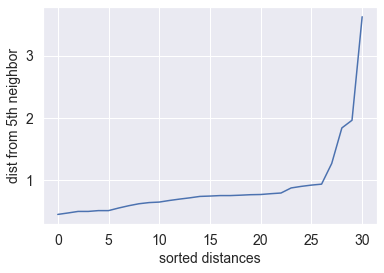

In [53]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=14)
plt.xlabel('sorted distances', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### Performing Regression Analysis on the Dataset 

In [54]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

In [55]:
df = df.drop(['country'], axis = 1)

In [56]:
# have an overview of the dataset 
df.head()

,asthma,chronic_lower_respiratory_diseases,BMI,diabetes,everyday_alcohol,longstanding_health_issues,population_density,inform_risk,population_living_urban_areas,basic_sanitation_services,inform_vulnerability,inform_health_condition,epidemic_lack_coping_capacity,physicians_density,current_health_expenditure_per_capita,Age_average,Body_pain,Smoking_average,total_deaths_COVID_19,Risk_status
0,4.4,4.2,50.4,4.9,6.2,14.61,107.21,1.6,58.30,99.97,2.6,0.1,2.3,51.44,5295.18,13.50,20.45,47.15,168,Medium
1,4.3,4.0,48.8,5.3,14.2,8.22,377.21,1.9,98.00,99.49,1.9,0.1,1.7,33.23,4667.88,13.00,24.55,47.95,1143,High
2,2.7,4.6,44.6,6.4,8.9,9.02,64.70,2.4,75.01,86.00,2.3,0.2,3.1,39.88,1577.94,13.90,16.80,46.70,14,Low
3,3.0,4.2,41.9,7.1,9.1,12.12,73.08,2.1,56.95,96.54,1.1,0.1,3.0,29.96,1705.21,14.03,20.00,48.15,8,Low
4,4.3,2.1,49.2,6.1,4.2,18.58,128.71,3.0,66.81,99.15,4.2,0.1,1.6,19.51,2270.83,11.37,31.20,48.30,11,Low


In [57]:
# Encoding qualitative data
# df = pd.get_dummies(df, columns = ['Risk_status'],drop_first = False)
# df.head(3)

In [58]:
df1 = df.drop(['Risk_status'], axis = 1)

### Best subset selection

In [59]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [60]:
#Initialization variables
Y = df1.total_deaths_COVID_19
X = df1.drop(['total_deaths_COVID_19'], axis = 1)

In [61]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(Y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - Y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [62]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook
import itertools
k = 18
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 20 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 18 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  if __name__ == '__main__':


In [63]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(3))
display(df_max.head(3))

,numb_features,RSS,R_squared,features
4,1,17.049767,0.179281,"(everyday_alcohol,)"
122,2,13.012207,0.373636,"(inform_risk, current_health_expenditure_per_c..."
652,3,9.917340,0.522613,"(everyday_alcohol, inform_risk, current_health..."


,numb_features,RSS,R_squared,features
4,1,17.049767,0.179281,"(everyday_alcohol,)"
122,2,13.012207,0.373636,"(inform_risk, current_health_expenditure_per_c..."
652,3,9.917340,0.522613,"(everyday_alcohol, inform_risk, current_health..."


### Adding columns to the dataframe with RSS and R squared values of the best subset

In [64]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,18.586200,0.105323,"(asthma,)",17.049767,0.179281
1,1,20.644693,0.006234,"(chronic_lower_respiratory_diseases,)",17.049767,0.179281
2,1,20.006945,0.036933,"(BMI,)",17.049767,0.179281
3,1,19.726436,0.050436,"(diabetes,)",17.049767,0.179281
4,1,17.049767,0.179281,"(everyday_alcohol,)",17.049767,0.179281


#### Plotting the best subset selection process

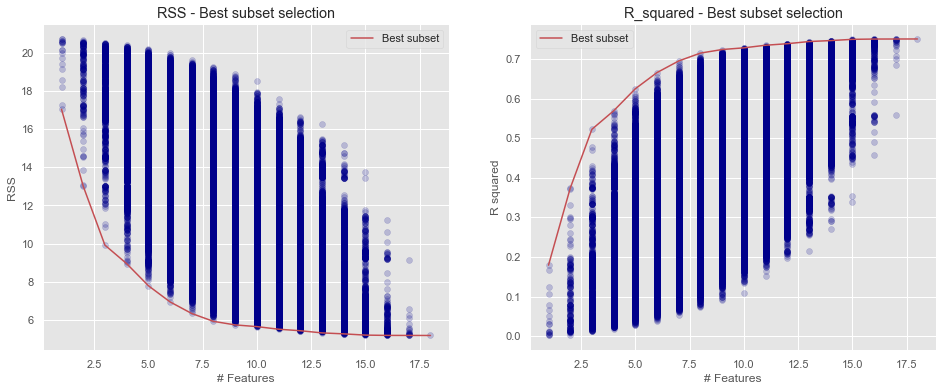

In [65]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

### Forward stepwise selection

For computational reasons, the best subset cannot be applied for any large n due to the $2^n$ complexity. Forward Stepwise begins with a model containing no predictors, and then adds predictors to the model, one at the time. At each step, the variable that gives the greatest additional improvement to the fit is added to the model.

#### Algorithm

Let $M_0$ denote the null model which contains no predictors

For $k=1,2,...,n−1$
1. Consider all $n−k$ models that augment the predictors in $M_k$ with one additional predictor
2. Choose the $\textit{best}$ among these $n−k$ models, and call it $M_{k+1}$
3. Select the single best model among $M_0,M_1,...,M_n$ using cross validated predicton error, $C_p$, BIC, adjusted $R^2$ or any other method.

In [69]:
# Getting the dataset
df = pd.read_csv("d123.csv")

# Filling Missing observations in Continuous variables in the dataset:
df.fillna(df.mean(), inplace=True)
df = df.drop(['country'], axis = 1)
df = df.drop(['Risk_status'], axis = 1)

In [71]:

#Initialization variables
y = df.total_deaths_COVID_19
X = df.drop(['total_deaths_COVID_19'], axis = 1)

k = 18

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

#### Displaying results of the first 4 steps

In [73]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,18)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['epidemic_lack_coping_capacity'], 276651628.0),
 (2, ['epidemic_lack_coping_capacity', 'everyday_alcohol'], 241730554.0),
 (3,
  ['epidemic_lack_coping_capacity',
   'everyday_alcohol',
   'basic_sanitation_services'],
  214128130.0),
 (4,
  ['epidemic_lack_coping_capacity',
   'everyday_alcohol',
   'basic_sanitation_services',
   'asthma'],
  199633783.0),
 (5,
  ['epidemic_lack_coping_capacity',
   'everyday_alcohol',
   'basic_sanitation_services',
   'asthma',
   'inform_health_condition'],
  184355464.0),
 (6,
  ['epidemic_lack_coping_capacity',
   'everyday_alcohol',
   'basic_sanitation_services',
   'asthma',
   'inform_health_condition',
   'inform_vulnerability'],
  169801098.0),
 (7,
  ['epidemic_lack_coping_capacity',
   'everyday_alcohol',
   'basic_sanitation_services',
   'asthma',
   'inform_health_condition',
   'inform_vulnerability',
   'chronic_lower_respiratory_diseases'],
  156462583.0),
 (8,
  ['epidemic_lack_coping_capacity',
   'everyday_alcohol',
   'ba

#### Comparing models: AIC, BIC, Mallows'CP

The training set Mean Squared Error (MSE) is generally an underestimate of the test MSE. This is because when we fit a model to the training data using least squares, we specifically estimate the regression coefficients such that the training RSS is minimized. In particular, the training RSS decreases as we add more features to the model, but the test error may not. Therefore, the training RSS and $R^2$ may not be used for selecting the best model unless we adjust for this underestimation.

#### Mallow's $C_p$

Mallow's $C_p$ is named after Colin Lingwood Mallows and is defined as:

$C_p =\dfrac{1}{m}(RSS + 2d{\hat{\sigma}}^2) $

where ${\hat{\sigma}}^2$ is an estimate of the variance of the error $ϵ$ associated with each response measurement. Typically ${\hat{σ}}^2$ is estimated using the full model containing all predictors.

Essentially,the Cp statistic adds a penalty of $2d{\hat{σ}}^2$ to the training RSS in order to adjust for the fact that the training error tends to underestimate the test error. Clearly, the penalty increases as the number of predictors in the model increases, and this is intended to adjust for the corresponding decrease in training RSS. It can be shown that if ${\hat{\sigma}}^2$ is an unbiased estimate of $\sigma^2$ then Cp is an unbiased estimate of the test MSE, so we choose the model with the smallest $C_p$.

#### Akaike's Information Criteria (AIC)

The AIC criterion is defiend for a large class of models fit by maximum likelihood. In the case of a linear model with Gaussian errors, MLE and least squares are the same thing and the AIC is given by: 

$AIC =\dfrac{1}{m{\hat{\sigma}}^2}(RSS + 2d{\hat{\sigma}}^2) $


#### Bayesian Information Criteria (BIC)

BIC is derived from a Bayesian point of view, and looks similar to the $C_p$ and AIC - it is defined (up to irrelevant constants) as:

$BIC =\dfrac{1}{m{\hat{\sigma}}^2}(RSS + \log(m)d{\hat{\sigma}}^2) $


Like $C_p$ and AIC, the BIC will tend to take small values for a model with low test error.

#### Adjusted $R^2$

the adjusted $R^2$ accounts for that fact and introduces a penalty. The intuition is that once all the correct variables have been included in the model,additional noise variables will lead to a very small decrase in RSS, but an increase in $k$ and hence will decrease the adjusted $R^2$. In effect, we pay a price for the inclusion of unnecessary variables in the model.

$ R_{\alpha}^2 = 1 - \dfrac{RSS/(m-k-1)}{TSS/(m-1)} = 1 - (1-R^2)\dfrac{m-1}{m-k-1}$

#### Combining forward stepwise results into a new DataFrame

In [74]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),
                 pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [75]:
df1.head()

,features,RSS,R_squared,numb_features
1,[epidemic_lack_coping_capacity],2.766516e+08,0.186959,1
2,"[epidemic_lack_coping_capacity, everyday_alcohol]",2.417306e+08,0.289587,2
3,"[epidemic_lack_coping_capacity, everyday_alcoh...",2.141281e+08,0.370707,3
4,"[epidemic_lack_coping_capacity, everyday_alcoh...",1.996338e+08,0.413304,4
5,"[epidemic_lack_coping_capacity, everyday_alcoh...",1.843555e+08,0.458205,5


#### Computing the $C_p$, AIC, BIC and R-square adjusted

In [76]:
#Initializing useful variables
m = len(y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[epidemic_lack_coping_capacity],2.766516e+08,0.186959,1,9.300492e+06,1.594786,1.641043,0.158923
2,"[epidemic_lack_coping_capacity, everyday_alcohol]",2.417306e+08,0.289587,2,8.550252e+06,1.466140,1.558655,0.238844
3,"[epidemic_lack_coping_capacity, everyday_alcoh...",2.141281e+08,0.370707,3,8.036097e+06,1.377976,1.516749,0.300786
4,"[epidemic_lack_coping_capacity, everyday_alcoh...",1.996338e+08,0.413304,4,7.944783e+06,1.362318,1.547349,0.323043
5,"[epidemic_lack_coping_capacity, everyday_alcoh...",1.843555e+08,0.458205,5,7.828180e+06,1.342324,1.573612,0.349846
6,"[epidemic_lack_coping_capacity, everyday_alcoh...",1.698011e+08,0.500978,6,7.734931e+06,1.326334,1.603880,0.376223
7,"[epidemic_lack_coping_capacity, everyday_alcoh...",1.564626e+08,0.540178,7,7.680902e+06,1.317069,1.640873,0.400232
8,"[epidemic_lack_coping_capacity, everyday_alcoh...",1.468881e+08,0.568316,8,7.748295e+06,1.328625,1.698687,0.411340
9,"[epidemic_lack_coping_capacity, everyday_alcoh...",1.396109e+08,0.589703,9,7.889792e+06,1.352888,1.769207,0.413861
10,"[epidemic_lack_coping_capacity, everyday_alcoh...",1.321928e+08,0.611504,10,8.026744e+06,1.376372,1.838948,0.417256


In [77]:
df1['R_squared_adj'].idxmax()
df1['R_squared_adj'].max()

0.41967631273945416

#### Plotting the computed values as a function of number of features

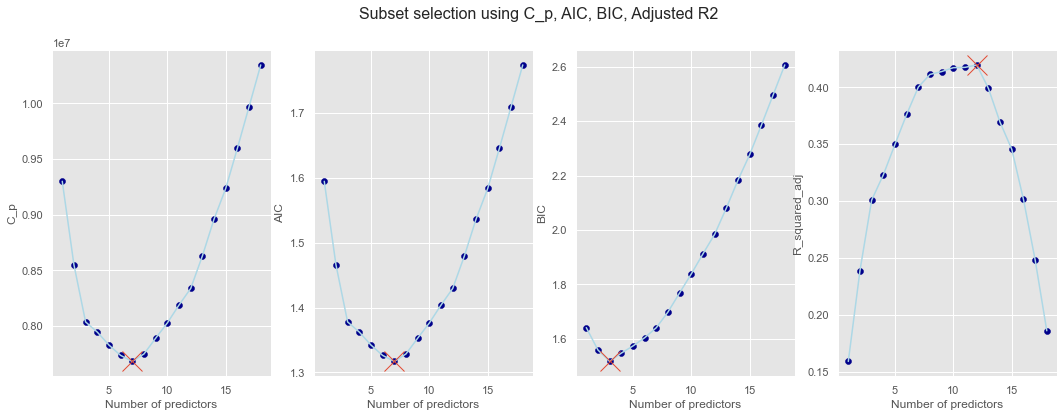

In [78]:
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

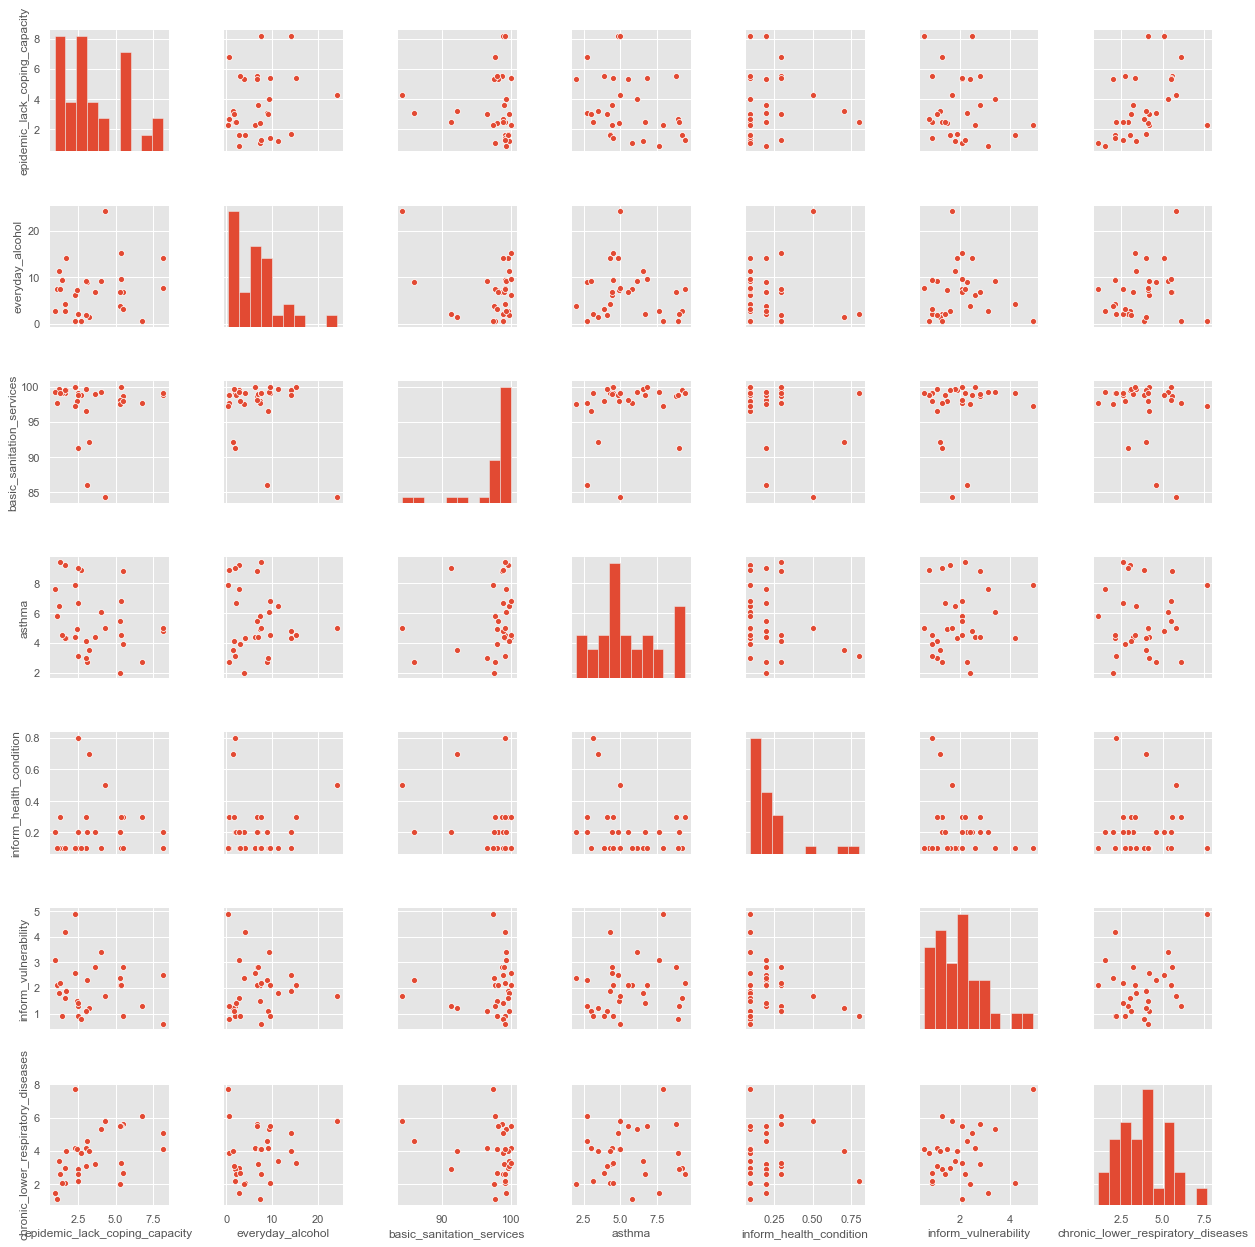

In [79]:
sns.pairplot(X[['epidemic_lack_coping_capacity',
   'everyday_alcohol',
   'basic_sanitation_services',
   'asthma',
   'inform_health_condition',
   'inform_vulnerability',
   'chronic_lower_respiratory_diseases']]);

In [87]:
b = finalDf.drop(['Risk_status'], axis = 1)
c = b.drop(['country'], axis = 1)
X = sm.add_constant(c)

In [88]:
X.head()

,const,principal component 1,principal component 2
0,1.0,-1.561890,-0.412450
1,1.0,-0.584151,0.511710
2,1.0,1.435676,-1.422423
3,1.0,1.980693,-1.325595
4,1.0,2.005232,2.873987


In [89]:
model_1 = sm.OLS(y, X)
result_1 = model_1.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     total_deaths_COVID_19   R-squared:                       0.008
Model:                               OLS   Adj. R-squared:                 -0.063
Method:                    Least Squares   F-statistic:                    0.1088
Date:                   Thu, 16 Apr 2020   Prob (F-statistic):              0.897
Time:                           23:22:06   Log-Likelihood:                -295.14
No. Observations:                     31   AIC:                             596.3
Df Residuals:                         28   BIC:                             600.6
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1334.1290    623.692      2.139      0.041      56.554    2611.704
principal component 1   152.5167    327.199      0.466      0.645    -517.720     822.753
principal component 2     6.1993    381.903      0.016      0.987    -776.093     788.491
==============================================================================
Omnibus:                       40.286   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.068
Skew:                           2.908   Prob(JB):                     1.40e-26
Kurtosis:                      10.639   Cond. No.                         1.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""